# Workshop 5

* Data visualization with matplotlib and seaborn

* Linear regression (regression) hypothesis check

* Note: This workshop builds up on workshop 4 material, so looking at workshop 4 will help you understand this workshop better.

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
# read in data
gss = pd.read_csv('GSS.2006.csv')

In [3]:
gss.columns # too many columns, can't see all

Index(['vpsu', 'vstrat', 'adults', 'ballot', 'dateintv', 'famgen', 'form',
       'formwt', 'gender1', 'hompop',
       ...
       'away7', 'gender14', 'old14', 'relate14', 'relhh14', 'relhhd14',
       'relsp14', 'where12', 'where6', 'where7'],
      dtype='object', length=1261)

In [4]:
# use a for loop to print them all
for c in gss.columns:
    print(c)

vpsu
vstrat
adults
ballot
dateintv
famgen
form
formwt
gender1
hompop
id
intage
intid
intyrs
mode
oversamp
phase
race
reg16
region
relate1
relhh1
relhhd1
respnum
rvisitor
sampcode
sample
sex
size
spaneng
srcbelt
version
visitors
wtss
wtssall
wtssnr
xnorcsiz
year
hispanic
rplace
degree
hefinfo
wrkstat
racecen1
marital
phone
comprend
coop
feeused
hhrace
lngthinv
educ
childs
ethnum
age
cohort
intrace1
attend
inthisp
hhtype
hhtype1
earnrs
whoelse6
whoelse1
whoelse2
whoelse3
whoelse4
whoelse5
partyid
relig
teens
preteen
babies
reliten
dwelling
vote04
mar1
zodiac
old1
fund
polviews
income
income06
wrkslf
isco681
isco88
occ80
prestg80
wrkgovt
sei
intethn
intsex
indus80
eth1
trust
realinc
coninc
ethnic
health
union
gender2
relate2
relhh2
relhhd2
wksub
wksup
old2
mar2
widowed
unrelat
born
saqsex
weekswrk
family16
relig16
res16
sibs
parborn
happy
mobile16
satfin
finalter
relactiv
relexper
savesoul
class
pray
relpersn
relexp
god
reborn
finrela
sprtprsn
rellife
pres04
bible
vote00
rotapple
blkwhite

relhh14
relhhd14
relsp14
where12
where6
where7


In [5]:
# subset the dataset - why? i) leave the raw dataframe for reference, ii) smaller sized, easier to compute
sub_gss = gss[['sex', 'realinc', 'educ', 'race']]

In [6]:
sub_gss.head() # check

,sex,realinc,educ,race
0,2,18476.25,13.0,2
1,1,46901.25,14.0,3
2,2,NaN,9.0,1
3,2,25582.50,12.0,2
4,1,NaN,14.0,2


# Assumption Checks

* Distribution of data - histograms, violinplot, swarmplot

In linear regression, it is important to check distribution of dependent variable ($y$) for outliers and normality.

In [7]:
sub_gss['realinc'].describe()

count      3873.000000
mean      33750.685354
std       32728.081135
min         284.250000
25%       12080.625000
50%       25582.500000
75%       46901.250000
max      144502.717140
Name: realinc, dtype: float64

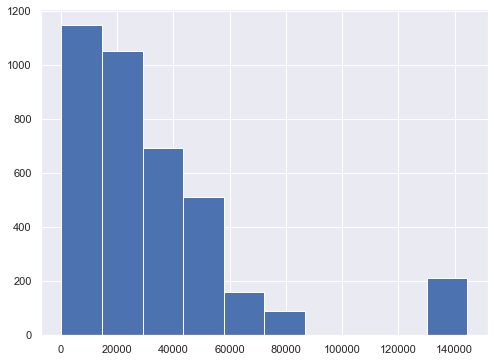

In [13]:
# histogram - bin default (10)

sns.set()
plt.figure(figsize = (8,6)) # set the figure size. width is 8, height is 6.
_ = plt.hist(sub_gss['realinc']) # default bin size is 10. 
# Bins are essentially 'groups', histogram does a count for how many data points fall into each bin.

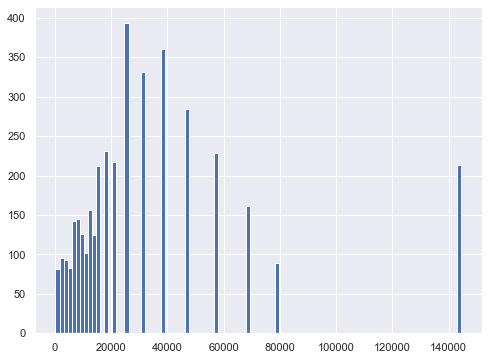

In [15]:
# histogram - change the number of bins to 100

plt.figure(figsize = (8,6))
_ = plt.hist(sub_gss['realinc'], bins = 100)

C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


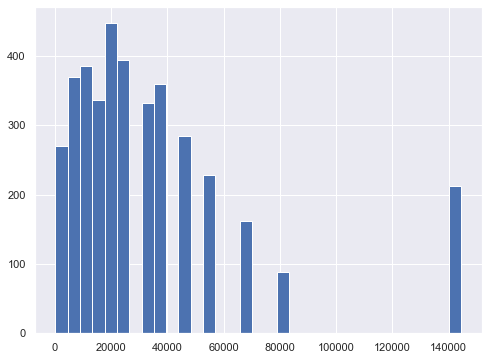

In [16]:
# histogram - set the bin size to auto

plt.figure(figsize = (8,6))
_ = plt.hist(sub_gss['realinc'], bins = 'auto')

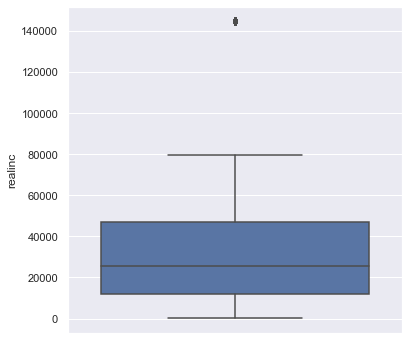

In [20]:
# Boxplot

# Shows the quartiles, interquartile range (IQR), and outliers

plt.figure(figsize=(6,6))
_ = sns.boxplot(sub_gss['realinc'], orient = 'v')

In [17]:
help(sns.boxplot) # documentation for more information

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` paramet

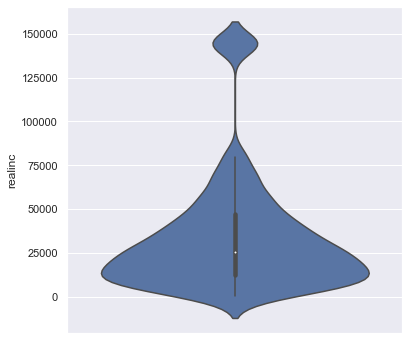

In [21]:
# Violin plot

# Violin plot is similar to boxplot in that it shows distribution. Violin plots visualize density.
plt.figure(figsize=(6,6))
_ = sns.violinplot(sub_gss['realinc'], orient = 'v')

In [22]:
help(sns.violinplot) # documenation for more information

Help on function violinplot in module seaborn.categorical:

violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the sa

C:\Users\bolim\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\bolim\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


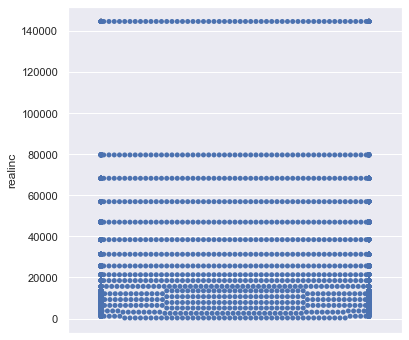

In [23]:
# Swarmplot

# Swarmplots are useful when the dataset is smaller.
plt.figure(figsize=(6,6))
_ = sns.swarmplot(sub_gss['realinc'], orient = 'v')

In [24]:
help(sns.swarmplot) # documentation for more information

Help on function swarmplot in module seaborn.categorical:

swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
    Draw a categorical scatterplot with non-overlapping points.
    
    This function is similar to :func:`stripplot`, but the points are adjusted
    (only along the categorical axis) so that they don't overlap. This gives a
    better representation of the distribution of values, but it does not scale
    well to large numbers of observations. This style of plot is sometimes
    called a "beeswarm".
    
    A swarm plot can be drawn on its own, but it is also a good complement
    to a box or violin plot in cases where you want to show all observations
    along with some representation of the underlying distribution.
    
    Arranging the points properly requires an accurate transformation between
    data and point coordinates. This means 

# Categorical variables & distribution with dependent variable

## Is your dummy variable meaningful?

In [29]:
# Recode variable sex and call the recoded variable sex2
# In original 1 is male, 2 is female. Recoded one makes 1 male and 0 for female
sub_gss['male'] = ['male' if val == 1 else 'female' for val in sub_gss['sex']]

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black,male
0,2,18476.25,13.0,2,0,1,female
1,1,46901.25,14.0,3,1,0,male
2,2,NaN,9.0,1,0,0,female
3,2,25582.50,12.0,2,0,1,female
4,1,NaN,14.0,2,1,1,male


In [27]:
# Recode variable race and call it black
# 1 if the respondent's race is black (race is 2), 0 if otherwise (race is 1 or 3)
sub_gss['black'] = [1 if val == 2 else 0 for val in sub_gss['race']] 

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black
0,2,18476.25,13.0,2,0,1
1,1,46901.25,14.0,3,1,0
2,2,NaN,9.0,1,0,0
3,2,25582.50,12.0,2,0,1
4,1,NaN,14.0,2,1,1


In [31]:
# Recode variable race and call it black
# 1 if the respondent's race is black (race is 2), 0 if otherwise (race is 1 or 3)
sub_gss['black2'] = [True if val == 2 else False for val in sub_gss['race']] 

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black,male,black2
0,2,18476.25,13.0,2,0,1,female,True
1,1,46901.25,14.0,3,1,0,male,False
2,2,NaN,9.0,1,0,0,female,False
3,2,25582.50,12.0,2,0,1,female,True
4,1,NaN,14.0,2,1,1,male,True


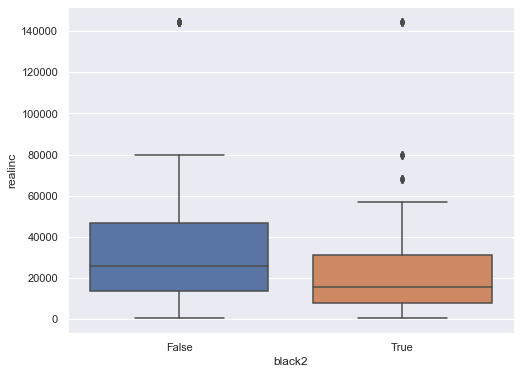

In [33]:
# Boxplot

# Check distribution for black and not-black population to see if there is a difference.
# Plot shows that the distribution is different.

plt.figure(figsize = (8, 6)) # figsize = (width, height)
_ = sns.boxplot(x = 'black2', y = 'realinc', data = sub_gss) 

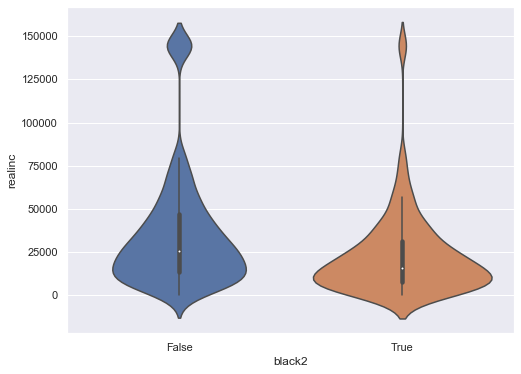

In [34]:
# Violin plot
# Able to check it with violin plot as well.

plt.figure(figsize = (8, 6))
_ = sns.violinplot(x = 'black2', y = 'realinc', data = sub_gss)

C:\Users\bolim\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\bolim\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


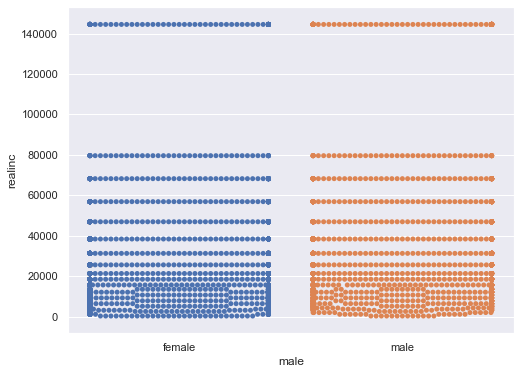

In [35]:
# Different categorical variable - gender

# bee swram plot
plt.figure(figsize = (8, 6))
_ = sns.swarmplot(x = 'male', y = 'realinc', data = sub_gss)

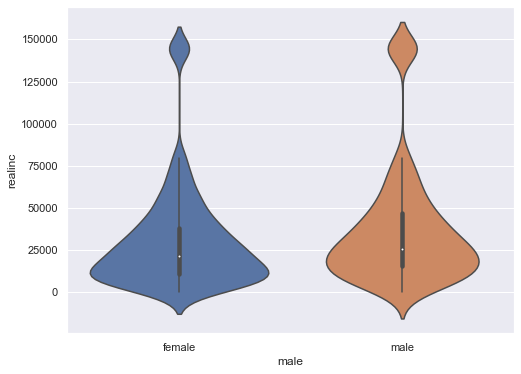

In [36]:
# Violin plot

# bee swarm plot is not the best, violin plot shows better distribution
plt.figure(figsize = (8, 6))
_ = sns.violinplot(x = 'male', y = 'realinc', data = sub_gss)

# Regression

Run regression and interpret them

In [37]:
# Run a regression
# Predict real income as a function of years of education, sex and race
# use C() to treat the independent variable as a categorical variable
model = ols(formula = 'realinc ~ educ*C(male) + C(black2)', data = sub_gss).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     168.0
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          8.31e-133
Time:                        09:43:18   Log-Likelihood:                -45368.
No. Observations:                3866   AIC:                         9.075e+04
Df Residuals:                    3861   BIC:                         9.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.251e+04 

* Interpreting interaction terms:

For each additional of year of education, females earn 3346.4433 dollars more. For each additional year of education, males earn 3794.4678(3346.4433+448.0245) dollars more.


* Interpreting dummy variables:

Controlling for sex and years of education, on average, black people earn 1.034e+04 dollars less.

# Histograms

For linear regression, when a variable is logged, the scales are adjusted and hence values that are outliers are less influential.

Below are some codes to check the distribution of the dependent variable `realinc` (real income in dollars), and how it is logged.

In [38]:
import numpy as np # import the numpy package for logging

In [39]:
sub_gss['realinc_log'] = np.log((sub_gss['realinc'] + 1)) # new column. add 1 because one cannot log 0.

C:\Users\bolim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
sub_gss.head() # check

,sex,realinc,educ,race,sex2,black,male,black2,realinc_log
0,2,18476.25,13.0,2,0,1,female,True,9.824296
1,1,46901.25,14.0,3,1,0,male,False,10.755821
2,2,NaN,9.0,1,0,0,female,False,NaN
3,2,25582.50,12.0,2,0,1,female,True,10.149703
4,1,NaN,14.0,2,1,1,male,True,NaN


In [41]:
np.log(18476.25) # check

9.824241402526283

C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bolim\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


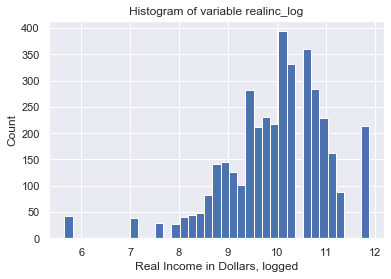

In [42]:
# Create visualization for the logged values

_ = plt.hist(sub_gss['realinc_log'], bins = 'auto')
_ = plt.xlabel('Real Income in Dollars, logged')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of variable realinc_log')

The distribution looks more normal and better scaled for linear regression analysis. The model is run again, but this time, the dependent variable is logged.

In [43]:
model2 = ols(formula = 'realinc_log ~ educ*C(male) + C(black2)', data = sub_gss).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            realinc_log   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          5.67e-161
Time:                        09:51:37   Log-Likelihood:                -5312.6
No. Observations:                3866   AIC:                         1.064e+04
Df Residuals:                    3861   BIC:                         1.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.2162 

When the dependent variable is logged, adjusted R-squared increases. `model2` can explain more variablility than `model1`. This shows that without extra variables, logging helps to increase model performance.


* Interpreting log - level model: Percentage

For females (base - sex is female), for each additional year of education, on average, has _12.92%_ increase for income. For males, for each additional year of education, on average, has _11.29%_ increase for income. (11.29 = (0.1292 - 0.0163)*100)

* Interpreting dummy variable with interaction terms:

First calculate the interaction, then add the dummy variable.

* Intercept:

All the independent variables are zero. For dummy variables, think of the base. In this case, the intercept is, for zero years of education, for female, and for not black population, logged value of real income on average is 8.2162.